In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%%time
data_url = 'https://www.dropbox.com/s/42qiax24owapd09/Rodent_Inspection.csv?dl=1'
rodent_df = pd.read_csv(data_url,
                        dtype={'ZIP_CODE': str},
                        parse_dates=['INSPECTION_DATE', 'APPROVED_DATE'],
                        infer_datetime_format = True
                       )

CPU times: user 9min 12s, sys: 3.49 s, total: 9min 16s
Wall time: 9min 31s


In [3]:
rodent_df.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,BAIT,1,PO12965,3,1011470035,1,1147,35,104,WEST 76 STREET,10023,990505.0,223527.0,40.780204,-73.977414,Manhattan,2009-10-14 12:00:27,Bait applied,2009-10-14 15:01:46,"(40.7802039792471, -73.9774144709456)"
1,BAIT,2,PO12966,3,1011470034,1,1147,34,102,WEST 76 STREET,10023,990516.0,223521.0,40.780188,-73.977375,Manhattan,2009-10-14 12:51:21,Bait applied,2009-10-14 15:02:30,"(40.7801875030438, -73.977374757787)"
2,BAIT,30,PO16966,3,2043370027,2,4337,27,620,THWAITES PLACE,10467,1020110.0,252216.0,40.858877,-73.870364,Bronx,2009-11-09 12:59:55,Bait applied,2009-11-10 14:54:52,"(40.8588765781972, -73.8703636422023)"
3,BAIT,31,PO13665,3,2037670077,2,3767,77,1227,WHITEPLAINS ROAD,10472,1022441.0,242180.0,40.831321,-73.861994,Bronx,2009-11-09 11:10:16,Bait applied,2009-11-10 14:56:42,"(40.8313209626148, -73.861994089899)"
4,BAIT,38,PO11291,3,1011690057,1,1169,57,2199,BROADWAY,10024,989641.0,224567.0,40.783059,-73.980533,Manhattan,2009-11-10 08:40:42,Bait applied,2009-11-17 11:39:11,"(40.7830590725833, -73.9805333640688)"


In [4]:
rodent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356414 entries, 0 to 1356413
Data columns (total 20 columns):
INSPECTION_TYPE                1356414 non-null object
JOB_TICKET_OR_WORK_ORDER_ID    1356414 non-null int64
JOB_ID                         1356414 non-null object
JOB_PROGRESS                   1356414 non-null int64
BBL                            1356414 non-null int64
BORO_CODE                      1356414 non-null int64
BLOCK                          1356414 non-null int64
LOT                            1356414 non-null int64
HOUSE_NUMBER                   1332987 non-null object
STREET_NAME                    1355759 non-null object
ZIP_CODE                       1356388 non-null object
X_COORD                        1346900 non-null float64
Y_COORD                        1346900 non-null float64
LATITUDE                       1353295 non-null float64
LONGITUDE                      1353295 non-null float64
BOROUGH                        1356414 non-null object
INSPECTIO

In [5]:
rodent_df.shape

(1356414, 20)

In [6]:
rodent_df['RESULT'].value_counts()

Passed Inspection     841595
Bait applied          177150
Active Rat Signs      164883
Problem Conditions    148645
Monitoring visit       22916
Cleanup done            1220
Name: RESULT, dtype: int64

In [7]:
rodent_df.INSPECTION_TYPE.value_counts()

INITIAL       957899
BAIT          200066
COMPLIANCE    197229
CLEAN_UPS       1220
Name: INSPECTION_TYPE, dtype: int64

In [8]:
rodent_df.BOROUGH.value_counts()

Manhattan        436653
Bronx            430540
Brooklyn         300332
Queens           145351
Staten Island     43538
Name: BOROUGH, dtype: int64

In [9]:
rodent_df['INSPECTION_DATE'].describe()

count                 1356412
unique                1327271
top       2011-10-01 07:00:00
freq                       30
first     1930-01-30 08:24:15
last      2018-12-29 11:15:31
Name: INSPECTION_DATE, dtype: object

In [10]:
# remove data from 2009 and before and 2018
new_rodent_df = rodent_df[(rodent_df['INSPECTION_DATE'].dt.year >= 2010) & 
                          (rodent_df['INSPECTION_DATE'].dt.year < 2018)]
new_rodent_df['INSPECTION_DATE'].describe()

count                 1315333
unique                1287059
top       2011-10-01 07:00:00
freq                       30
first     2010-01-01 09:55:00
last      2017-12-30 14:02:40
Name: INSPECTION_DATE, dtype: object

In [11]:
# remove where zip code 0
new_roden_df = new_rodent_df[(new_rodent_df['ZIP_CODE'] != "0")]

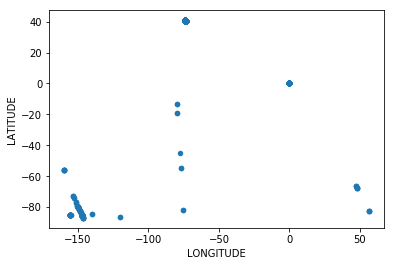

In [12]:
new_rodent_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

In [13]:
new_rodent_df[new_rodent_df.LONGITUDE.isnull() | new_rodent_df.LATITUDE.isnull()].shape

(2782, 20)

In [14]:
# remove null lat/log
new_rodent_df = new_rodent_df[~new_rodent_df.LONGITUDE.isnull() | ~new_rodent_df.LATITUDE.isnull()]
new_rodent_df.shape

(1312551, 20)

In [15]:
# fig, axs = plt.subplots(1, 2)
# axs[0].hist(rodent_df.LONGITUDE, bins=100)
# axs[1].hist(rodent_df.LATITUDE, bins=100)

In [16]:
# Limit coordinates near NYC
# Lat 40 to 41
# Long -74 to -73
lat_long_msk = (new_rodent_df.LATITUDE > 39) & (new_rodent_df.LATITUDE < 42) & \
          (new_rodent_df.LONGITUDE > -75) & (new_rodent_df.LONGITUDE < -72)
new_rodent_df[lat_long_msk].shape

(1311992, 20)

In [17]:
new_rodent_df = new_rodent_df[lat_long_msk]

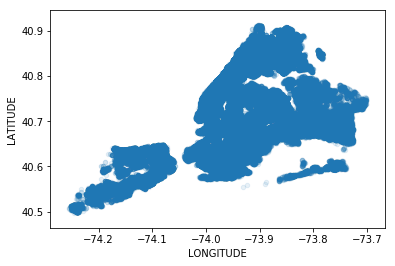

In [18]:
new_rodent_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1)

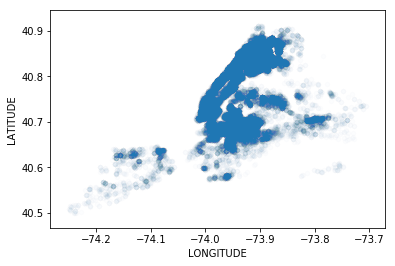

In [19]:
new_rodent_df[new_rodent_df['RESULT'] == 'Active Rat Signs'].plot(
    kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.01)

In [20]:
# df = df.groupby(['date'], as_index=False)['steps'].sum()
result_df = new_rodent_df[['BOROUGH', 'RESULT']].groupby(['BOROUGH', 'RESULT']).size().reset_index(name='count')
result_df.head()

,BOROUGH,RESULT,count
0,Bronx,Active Rat Signs,59095
1,Bronx,Bait applied,59719
2,Bronx,Cleanup done,379
3,Bronx,Monitoring visit,2414
4,Bronx,Passed Inspection,250796


<Container object of 30 artists>

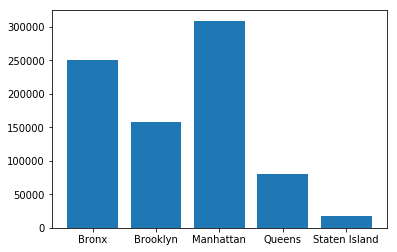

In [21]:
fig, ax = plt.subplots()
ax.bar(result_df['BOROUGH'], result_df['count'])

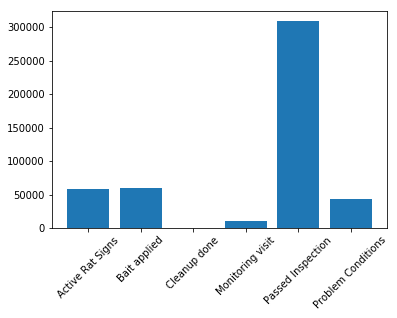

In [22]:
fig, ax = plt.subplots()
ax.bar(result_df['RESULT'], result_df['count'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Text(0.5,1,'Active Rat Signs by Borough')

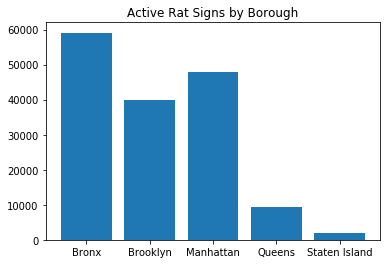

In [23]:
borough_active_df = result_df.loc[result_df['RESULT'] == 'Active Rat Signs']
fig, ax = plt.subplots()
ax.bar(borough_active_df['BOROUGH'], borough_active_df['count'])
ax.set_title('Active Rat Signs by Borough')

Text(0.5,1,'Bait Applied by Borough')

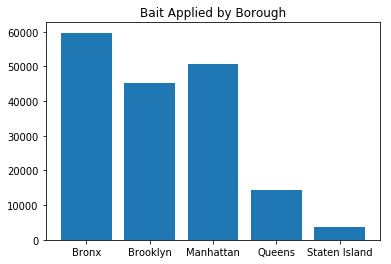

In [24]:
borough_bait_df = result_df.loc[result_df['RESULT'] == 'Bait applied']
fig, ax = plt.subplots()
ax.bar(borough_bait_df['BOROUGH'], borough_bait_df['count'])
ax.set_title('Bait Applied by Borough')

Text(0.5,1,'Problem Conditions by Borough')

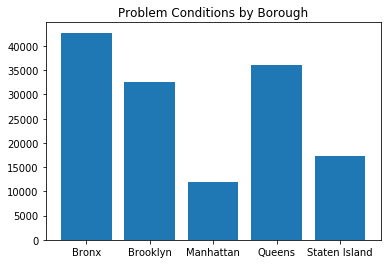

In [25]:
borough_prob_df = result_df.loc[result_df['RESULT'] == 'Problem Conditions']
fig, ax = plt.subplots()
ax.bar(borough_prob_df['BOROUGH'], borough_prob_df['count'])
ax.set_title('Problem Conditions by Borough')

In [26]:
# Active rat signs by year
active_rat_df = new_rodent_df[new_rodent_df['RESULT'] == 'Active Rat Signs']
active_rat_df.shape

(158168, 20)

In [27]:
# data.groupby(data.date.dt.year)
active_rat_df.groupby(active_rat_df['INSPECTION_DATE'].dt.year).size().reset_index(name='count')

,INSPECTION_DATE,count
0,2010,18518
1,2011,17875
2,2012,16922
3,2013,16368
4,2014,16341
5,2015,17474
6,2016,24068
7,2017,30602


In [28]:
# Active rat signs grouped by zip code
active_rat_df.groupby(['ZIP_CODE', 'BOROUGH']).size().reset_index(name='count') \
    .sort_values(['count'], ascending=False)

,ZIP_CODE,BOROUGH,count
70,10457,Bronx,9025
71,10458,Bronx,8228
69,10456,Bronx,6519
116,11221,Brooklyn,5681
82,10468,Bronx,5594
66,10453,Bronx,5243
131,11237,Brooklyn,4873
65,10452,Bronx,4075
81,10467,Bronx,3978
111,11216,Brooklyn,3926


In [29]:
# Active rat signs by year, month (line plot)

In [30]:
# Avg GPS location change over year (line plot movement)


# Zip codes with the biggest improvements by year
# Zip codes that are worse by year
# number of subways stops in a zipcode increase signs of rats
# does adding a subway stop (new UES line) increase signs of rats

In [269]:
# bring in subway data
# higher concentrations of rats near subway locations